In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.Data Cleaning and Preparation

#### READ THE DATA 

In [3]:
data=pd.read_csv('Cardiotocographic.csv')
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [5]:
data.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [9]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [11]:
data.shape

(2126, 14)

In [12]:
data.index

RangeIndex(start=0, stop=2126, step=1)

#### Check for duplicates

In [17]:
data[data.duplicated()]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [18]:
data.drop_duplicates(inplace=True)

In [19]:
data.shape

(2124, 14)

#### check for null values

In [22]:
data.isna().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

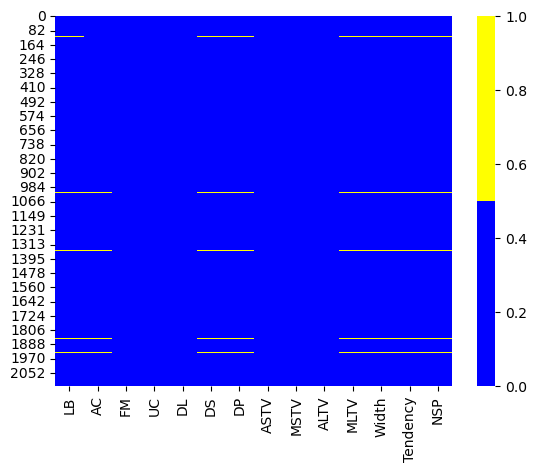

In [27]:
colmap=['blue','yellow']
sns.heatmap(data.isna(),cmap=colmap)
plt.show()

In [33]:
LB_mean=data['LB'].mean()
AC_mean=data['AC'].mean()
DS_mean=data['DS'].mean()
DP_mean=data['DP'].mean()
MLTV_mean=data['MLTV'].mean()
Width_mean=data['Width'].mean()
Tendency_mean=data['Tendency'].mean()
NSP_mean=data['NSP'].mean()

In [32]:
data.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [36]:
data.fillna({'LB':LB_mean,
                    'AC':AC_mean,
                    'DS':DS_mean,
                    'DP':DP_mean,
                    'MLTV':MLTV_mean,
                    'Width':Width_mean,
                    'Tendency':Tendency_mean,
                    'NSP':NSP_mean},inplace=True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2124 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2124 non-null   float64
 1   AC        2124 non-null   float64
 2   FM        2124 non-null   float64
 3   UC        2124 non-null   float64
 4   DL        2124 non-null   float64
 5   DS        2124 non-null   float64
 6   DP        2124 non-null   float64
 7   ASTV      2124 non-null   float64
 8   MSTV      2124 non-null   float64
 9   ALTV      2124 non-null   float64
 10  MLTV      2124 non-null   float64
 11  Width     2124 non-null   float64
 12  Tendency  2124 non-null   float64
 13  NSP       2124 non-null   float64
dtypes: float64(14)
memory usage: 248.9 KB


#### 2.Statistical Summary:

##### here we calculated mean,standard deviation,variance and Interquartile range

In [39]:
data.mean()

LB          133.342023
AC            0.003220
FM            0.009904
UC            0.004394
DL            0.001897
DS            0.000003
DP            0.000175
ASTV         47.012459
MSTV          1.364345
ALTV         10.295650
MLTV          8.280546
Width        70.461052
Tendency      0.316672
NSP           1.304797
dtype: float64

In [40]:
data.std()

LB          11.212396
AC           0.004371
FM           0.067571
UC           0.003340
DL           0.003344
DS           0.000141
DP           0.000836
ASTV        18.812403
MSTV         1.174084
ALTV        21.212676
MLTV         7.736420
Width       42.726905
Tendency     0.642653
NSP          0.641660
dtype: float64

In [41]:
data.var()

LB          1.257178e+02
AC          1.910949e-05
FM          4.565813e-03
UC          1.115817e-05
DL          1.118066e-05
DS          1.985300e-08
DP          6.988756e-07
ASTV        3.539065e+02
MSTV        1.378473e+00
ALTV        4.499776e+02
MLTV        5.985219e+01
Width       1.825588e+03
Tendency    4.130028e-01
NSP         4.117276e-01
dtype: float64

In [42]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000
mean,133.342023,0.003220,0.009904,0.004394,0.001897,0.000003,0.000175,47.012459,1.364345,10.295650,8.280546,70.461052,0.316672,1.304797
std,11.212396,0.004371,0.067571,0.003340,0.003344,0.000141,0.000836,18.812403,1.174084,21.212676,7.736420,42.726905,0.642653,0.641660
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001858,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004486,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005612,0.002568,0.006536,0.003292,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [47]:
Q3=data.quantile(0.75)
Q3

LB          140.000000
AC            0.005612
FM            0.002568
UC            0.006536
DL            0.003292
DS            0.000000
DP            0.000000
ASTV         61.000000
MSTV          1.700000
ALTV         11.000000
MLTV         10.800000
Width       100.000000
Tendency      1.000000
NSP           1.000000
Name: 0.75, dtype: float64

In [49]:
Q1=data.quantile(0.25)
Q1

LB          126.000000
AC            0.000000
FM            0.000000
UC            0.001858
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         32.000000
MSTV          0.700000
ALTV          0.000000
MLTV          4.600000
Width        37.000000
Tendency      0.000000
NSP           1.000000
Name: 0.25, dtype: float64

In [51]:
IQR=Q3-Q1
IQR

LB          14.000000
AC           0.005612
FM           0.002568
UC           0.004678
DL           0.003292
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.200000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64

####
LB (Baseline FHR): Mean ~133 bpm, SD ~11.3. Normal FHR ranges support this.

ASTV (Abnormal Short-Term Variability): High variability (Mean ~47, SD ~18.8), indicating strong signal variation in some cases.

ALTV (Abnormal Long-Term Variability): Very skewed with outliers (Mean ~10.3, Max ~182, Min ~-91), suggesting inconsistencies.

Width: Describes signal range. Wide span from -174 to 357, again suggesting possible anomalies or signal quality issues.

NSP (Target Class): Numeric values from -1.02 to 5, presumably the class label (needs encoding or clarification if classification is intended).

#### 3.Data Visualization

#### Histograms for numerical data

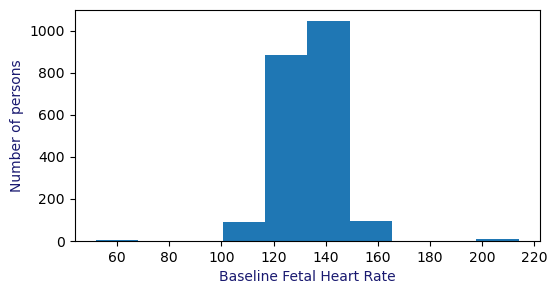

In [59]:
plt.figure(figsize=(6,3))
plt.xlabel('Baseline Fetal Heart Rate',color='midnightblue')
plt.ylabel('Number of persons',color='midnightblue')
plt.hist(data['LB'],bins=10)
plt.show()

#### the average fetal heart rate Between 110 and 160 bpm so around 100 persons are having low Baseline fetal rate

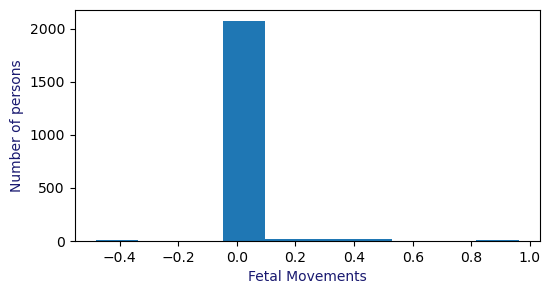

In [64]:
plt.figure(figsize=(6,3))
plt.xlabel('Fetal Movements',color='midnightblue')
plt.ylabel('Number of persons',color='midnightblue')
plt.hist(data['FM'],bins=10)
plt.show()

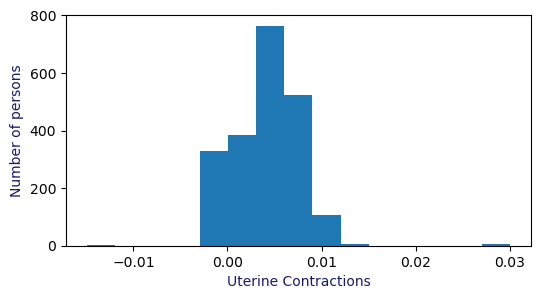

In [67]:
plt.figure(figsize=(6,3))
plt.xlabel('Uterine Contractions',color='midnightblue')
plt.ylabel('Number of persons',color='midnightblue')
plt.hist(data['UC'],bins=15)
plt.show()

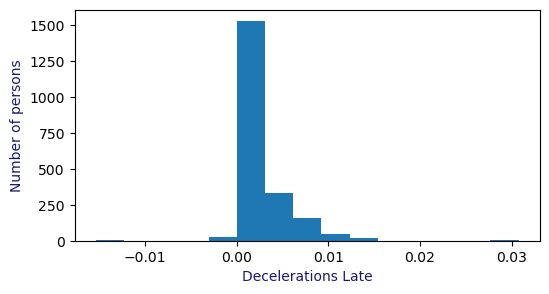

In [68]:
plt.figure(figsize=(6,3))
plt.xlabel('Decelerations Late',color='midnightblue')
plt.ylabel('Number of persons',color='midnightblue')
plt.hist(data['DL'],bins=15)
plt.show()

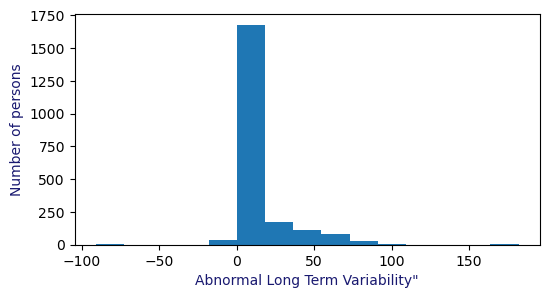

In [69]:
plt.figure(figsize=(6,3))
plt.xlabel('Abnormal Long Term Variability"',color='midnightblue')
plt.ylabel('Number of persons',color='midnightblue')
plt.hist(data['ALTV'],bins=15)
plt.show()

#### Box plots 

#### In boxplot we can see extreme outliers

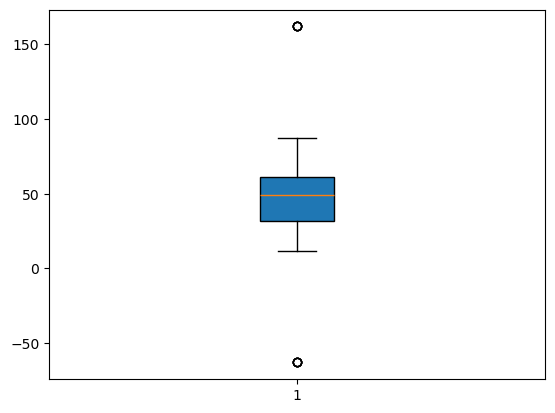

In [74]:

plt.boxplot(data['ASTV'],patch_artist=True)
plt.show()

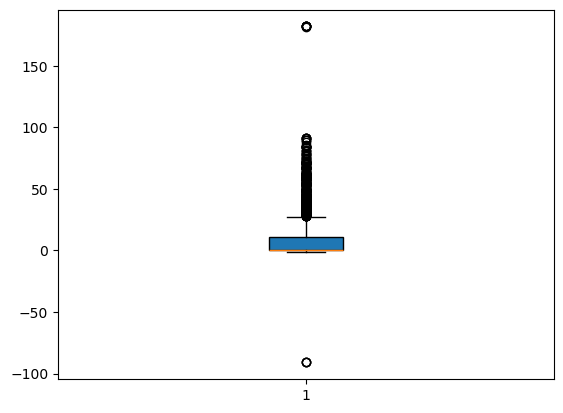

In [75]:

plt.boxplot(data['ALTV'],patch_artist=True)
plt.show()

##### IN ALTV SO MANY EXTREME OUTLIERS ARE THERE

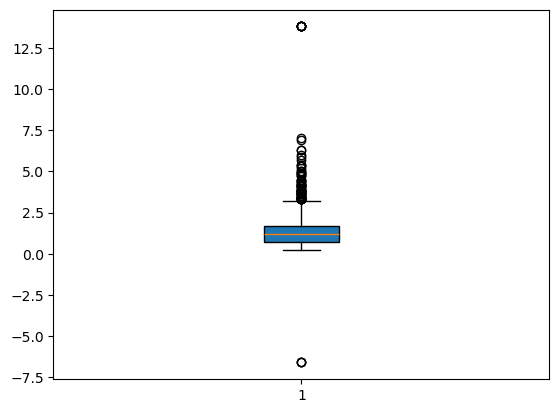

In [76]:
plt.boxplot(data['MSTV'],patch_artist=True)
plt.show()

##### IN MSTV ALSO SO MANY EXTREME OUTLIERS ARE THERE

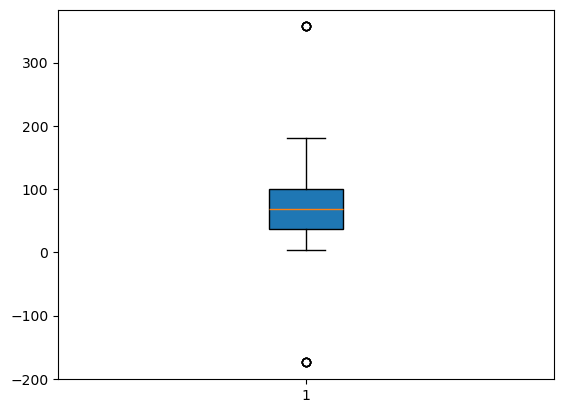

In [77]:
plt.boxplot(data['Width'],patch_artist=True)
plt.show()

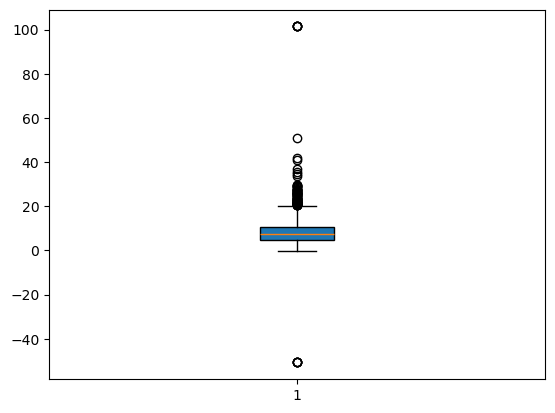

In [78]:
plt.boxplot(data['MLTV'],patch_artist=True)
plt.show()

####
ASTV, ALTV, MSTV, MLTV: Show significant spread with multiple extreme outliers.

FM, UC, DL, DP: Many outliers, but also tight IQRs indicating most values are clustered.

NSP and Tendency: Seem to have low variability with few or no outliers.

In [82]:
correlation=data.corr()
correlation

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.063452,0.018809,-0.166642,-0.126557,-0.005439,-0.047726,0.241666,-0.169224,0.210673,-0.003225,-0.118375,0.237112,0.132008
AC,-0.063452,1.000000,0.009406,0.071552,-0.093330,-0.033109,-0.083330,-0.231058,0.133903,-0.271204,-0.104658,0.234720,0.031896,-0.312189
FM,0.018809,0.009406,1.000000,-0.053386,0.009641,0.029896,0.121248,-0.032838,0.017061,-0.012005,-0.006156,0.097125,-0.018408,0.073991
UC,-0.166642,0.071552,-0.053386,1.000000,0.189737,-0.006942,0.070348,-0.182379,0.189685,-0.227881,-0.048754,0.106550,-0.066949,-0.185542
DL,-0.126557,-0.093330,0.009641,0.189737,1.000000,0.058429,0.144853,-0.069907,0.410216,-0.187275,-0.164942,0.408427,-0.023759,0.025095
DS,-0.005439,-0.033109,0.029896,-0.006942,0.058429,1.000000,0.004282,0.008414,0.016079,-0.004400,0.034366,0.040831,-0.015408,0.065399
DP,-0.047726,-0.083330,0.121248,0.070348,0.144853,0.004282,1.000000,0.037955,0.119270,-0.077760,-0.113993,0.175240,-0.130510,0.294416
ASTV,0.241666,-0.231058,-0.032838,-0.182379,-0.069907,0.008414,0.037955,1.000000,-0.293820,0.357310,-0.219225,-0.207778,-0.011331,0.421175
MSTV,-0.169224,0.133903,0.017061,0.189685,0.410216,0.016079,0.119270,-0.293820,1.000000,-0.291979,0.028653,0.433232,-0.036652,-0.094634
ALTV,0.210673,-0.271204,-0.012005,-0.227881,-0.187275,-0.004400,-0.077760,0.357310,-0.291979,1.000000,-0.107331,-0.346496,0.036504,0.365218


#### The correlation between features

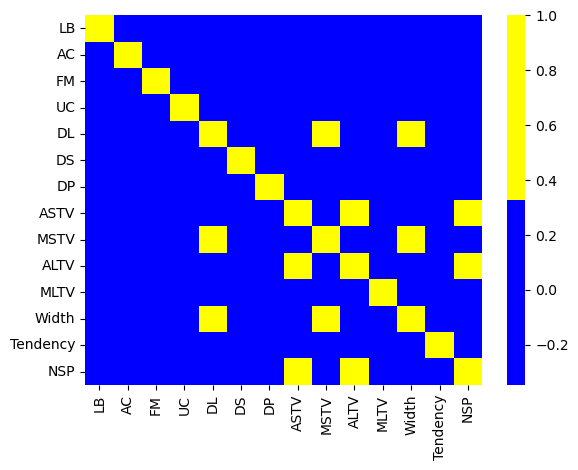

In [84]:
colmap=['blue','yellow']
sns.heatmap(correlation,cmap=colmap)
plt.show()

#### 4.Pattern Recognition and Insights:

#####
Strong/Moderate Correlations:
ASTV (Abnormal Short-Term Variability) is typically:

Positively correlated with MSTV (Mean Short-Term Variability): This suggests that as abnormal fluctuations increase, the average variability also rises — a possible marker of stress or irregular fetal activity.

Negatively correlated with NSP (if it's a health score/class): Higher ASTV could indicate deteriorating fetal condition.

ALTV (Abnormal Long-Term Variability):

Often strongly correlated with MLTV (Mean Long-Term Variability) — indicating structural consistency between variability metrics.

High ALTV might be linked to fetal distress and could correlate with elevated values in DP (Decelerations Prolonged).

UC (Uterine Contractions) and DL (Late Decelerations):

These may show positive correlations, as stronger or more frequent contractions often trigger delayed heart rate responses.

FM (Fetal Movement):

Might correlate negatively with DP or DL, suggesting fetal stress (less movement when decelerations occur more often).

#### 5.Conclusion:

#####
Missing Values Detected:
Several features (LB, AC, DS, DP, MLTV, etc.) had missing values. These must be handled carefully (e.g., imputation) before modeling to avoid bias or model degradation.

Outliers Identified:
Boxplots revealed extreme outliers in features like ASTV, ALTV, MSTV, Width, and FM. These can distort statistical summaries and model performance. Addressing them  is crucial.

Strong Feature Correlations:

ASTV and MSTV: Strong positive correlation, both measure short-term variability — a vital fetal health indicator.

ALTV and MLTV: Similarly correlated, capturing long-term fluctuation behavior.

UC and DL: Suggest interaction between uterine contractions and delayed heart rate responses — could be clinically significant.

NSP (target/class) shows relationships with ASTV, ALTV, and UC, useful for predictive modeling.